# Precio de las Casas en Boston

Trabajaremos con los dataset que vienen en la librería de Scikit-Learn. Entrenaremos modelos de Machine Learning: Regresión lineal simple y multilineal, para predecir el precio de las casas.

In [1]:
#Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets, linear_model   #aqui se encuentra el dataset y los modelos lineales
from sklearn.metrics import mean_squared_error #para calcular el error cuadrático medio 
from sklearn.model_selection import train_test_split #para separar datos de entrenamiento y de prueba
from sklearn.preprocessing import PolynomialFeatures #para definir el grado del polinomio

## 1. EDA y PREPROCESAMIENTO
- 1.1 Carga y primer vistazo de los datos
- 1.2 Descripción estadística
- 1.3 Visualización de los datos y eliminación de outliers
- 1.4 Análisis Multivariado (Correlaciones y gráficas de dispersión)

## 1.1 Carga y primer vistazo de los datos

In [2]:
#Importamos los datos de la librería Scikit-Learn
boston = datasets.load_boston()

#Buscamos cuales son las llaves del dataset para saber donde consultar la información
print('Llaves del dataset: ', boston.keys())

Llaves del dataset:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
#Descripción del dataset (conocemos el número y la descripción de las columnas, numero de registros, si hay valores nulos, etc. )
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print('Cantidad de datos: ', boston.data.shape)
print('Columnas de datos: ', boston.feature_names)
print('Registros del precios de las casas: ', boston.target.shape)

Cantidad de datos:  (506, 13)
Columnas de datos:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Registros del precios de las casas:  (506,)


In [5]:
#Para una mejor manejo y visualización, lo pasamos a un dataframe
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Información obtenida:
- El dataset se compone de 13 columnas con 506 registros cada una sin valores perdidos por lo que no tendremos que hacer mucho preprocesamiento.
- Tenemos la descripción de cada columna.
- Hay una columna que aparece en DESC pero no está en la data y es la columna MEDV

## 1.2 Descripción estadística

In [6]:
#Tenemos que data-type tiene cada columna y si presenta valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# Estadísticos de cada columna
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Información obtenida:
- Obtenemos los Dtype de cada columna y corroboramos que no presenta valores nulos.
- Todos los datos son numéricos continuos, salvo la columna Chas, esa es categórica binaria.
- Obtenemos los principales estadísticos de todas las columnas.

## 1.3 Visualización de los datos

Casi todo los datos son numéricos continuos, por lo que ocuparemos histogramas y gráficas de caja y brazo para visualizarlos.

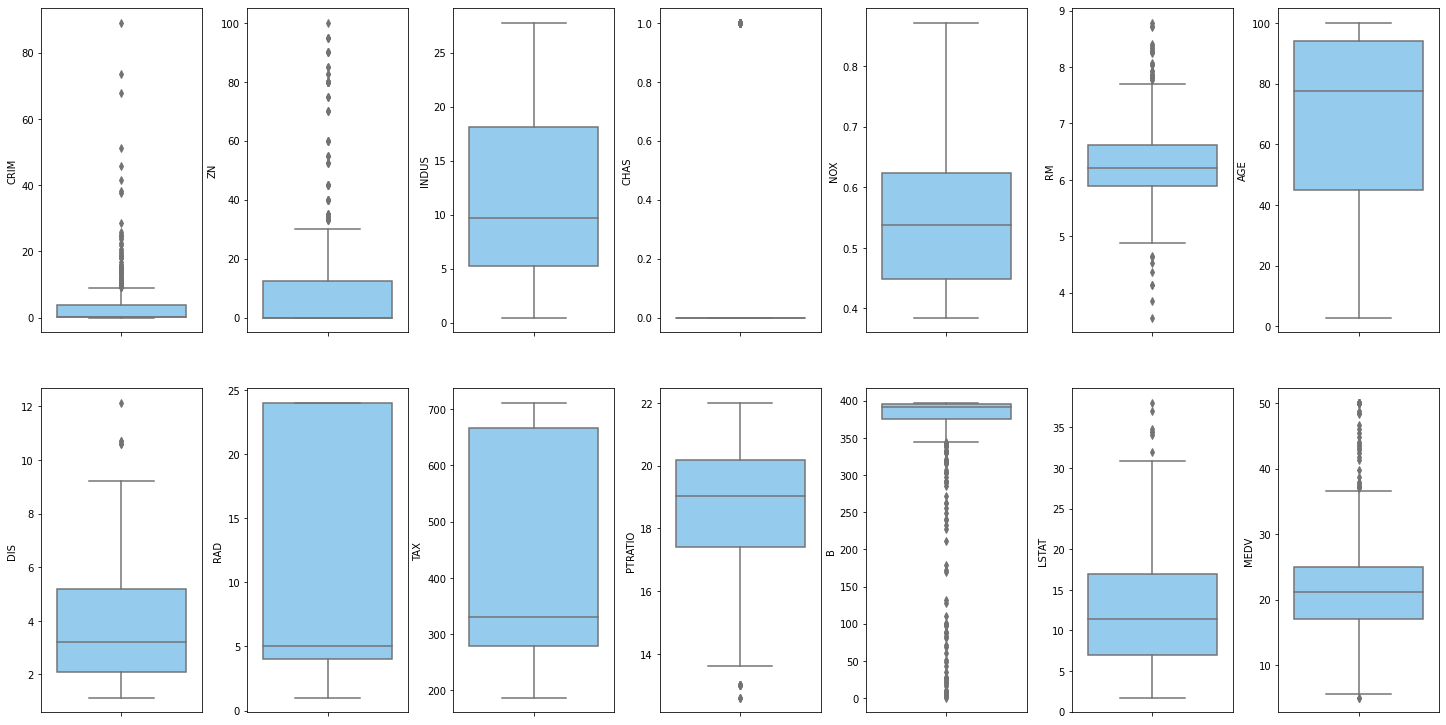

In [8]:
#Gráficas de caja y brazos de las diferentes variables 
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index], color = 'lightskyblue')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

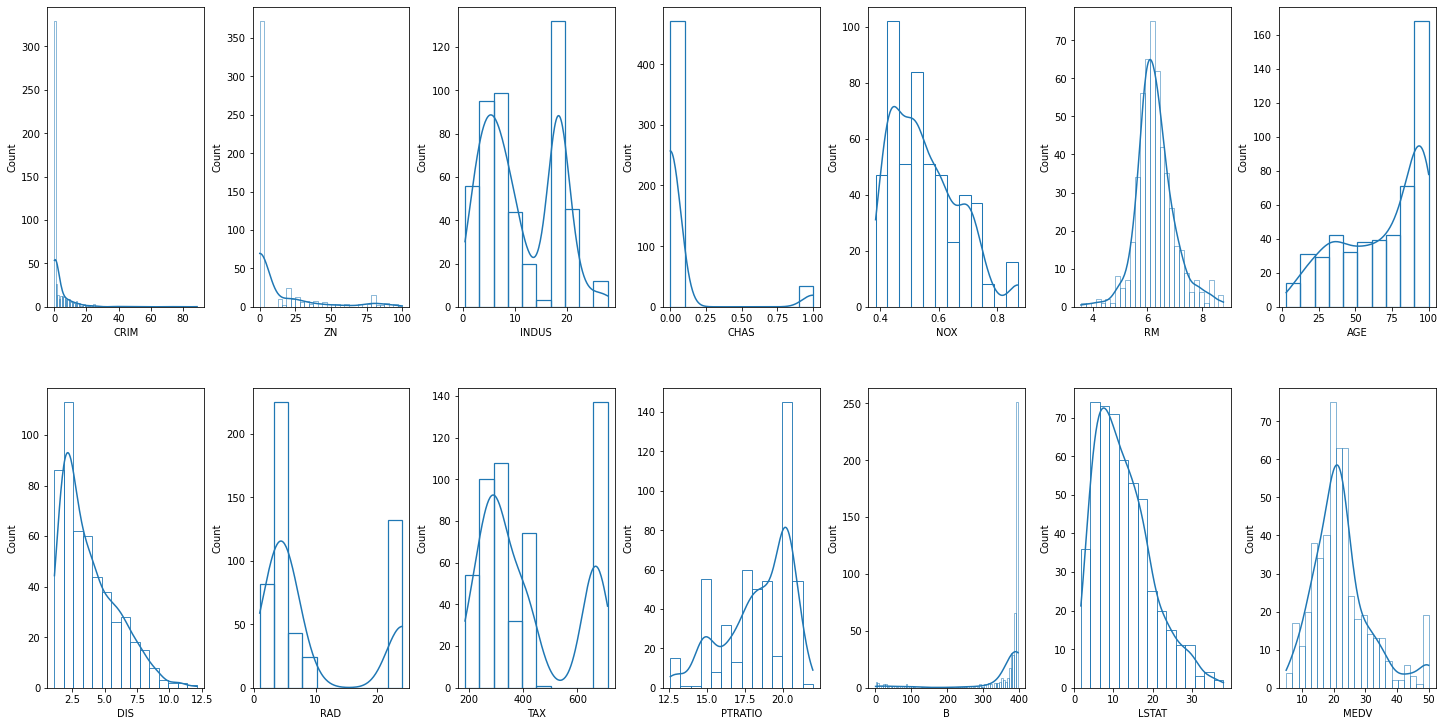

In [9]:
#Histogramas que muestra las distribuciones de los datos
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(x=k, data=df, kde = True, ax=axs[index], fill=False)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Información obtenida:
- De las gráficas de caja y brazos visualizamos que varias categorías presentan outliers (valores extremos), en particular, el precio de las casas MEDV, el cual realizaremos un pequeño preprocesamiento donde nos quedaremos hasta el percentil 95.
- Visualizamos que algunas de las distribucionesson normales, la más evidente es la del promedio de las habitaciones (RM) y el precio de las casa (MEDV). Hay otras distribuciones normales muy sesgadas como la tasa de crimen CRIM, la proporcion de terreno ZN y la proporcion de gente negra B. Otras presentan menor sesgo  como la distancia a centros de trabajo DIS y la proporcion de gente de clase baja LSTAT.

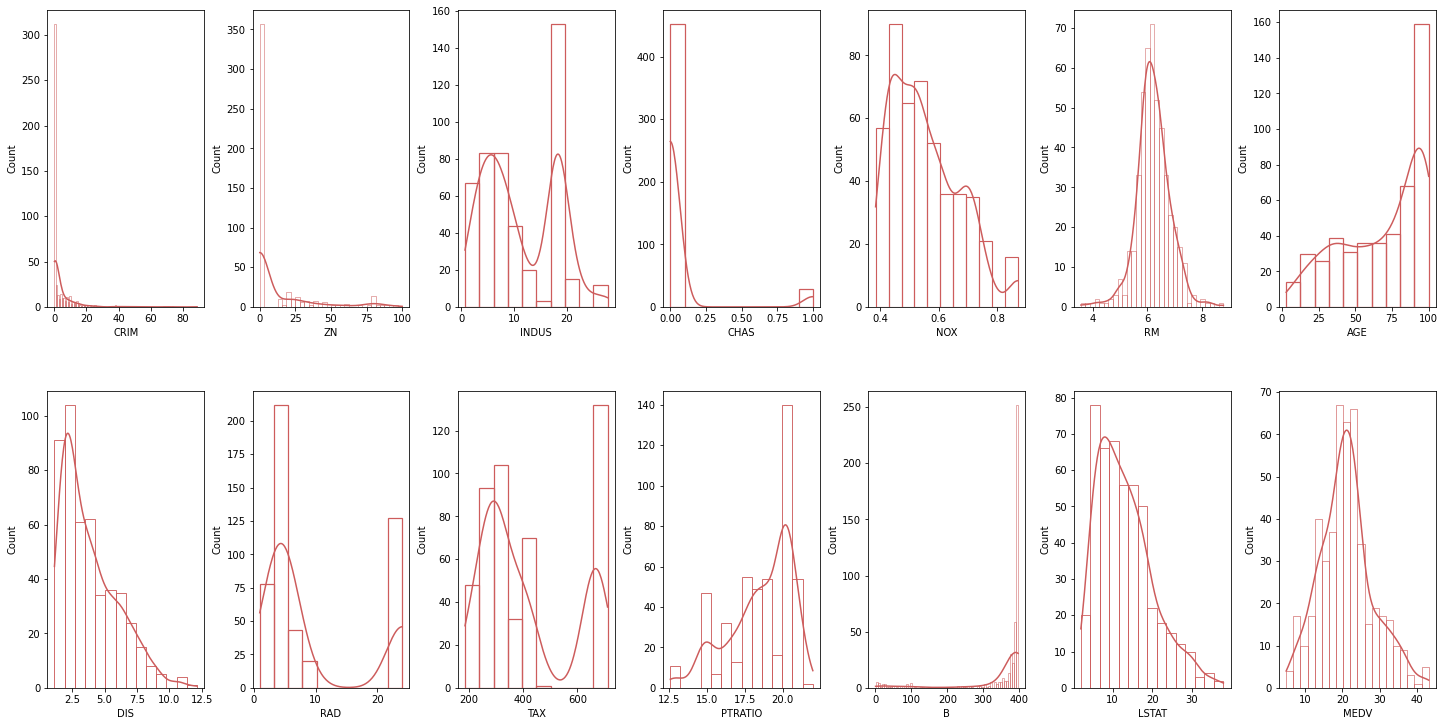

In [10]:
#Creamos un nuevo dataframe que solo incluya  los precios menores al percentil 95 
df_procesado = df.loc[df['MEDV'] <= df['MEDV'].quantile(0.95)]

#Vemos nuevamente las distribuciones
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_procesado.items():
    sns.histplot(x=k, data=df_procesado, kde = True, ax=axs[index], fill=False, color = 'indianred')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Información obtenida:
- La gráfica MEDV presenta una distribución normal más centrada, lo cual será beneficioso para el modelo ya que la regresión lineal requiere que los datos tengan una distribución normal para su mejor entrenamiento.

## 1.4 Análisis Multivariado (Correlaciones)

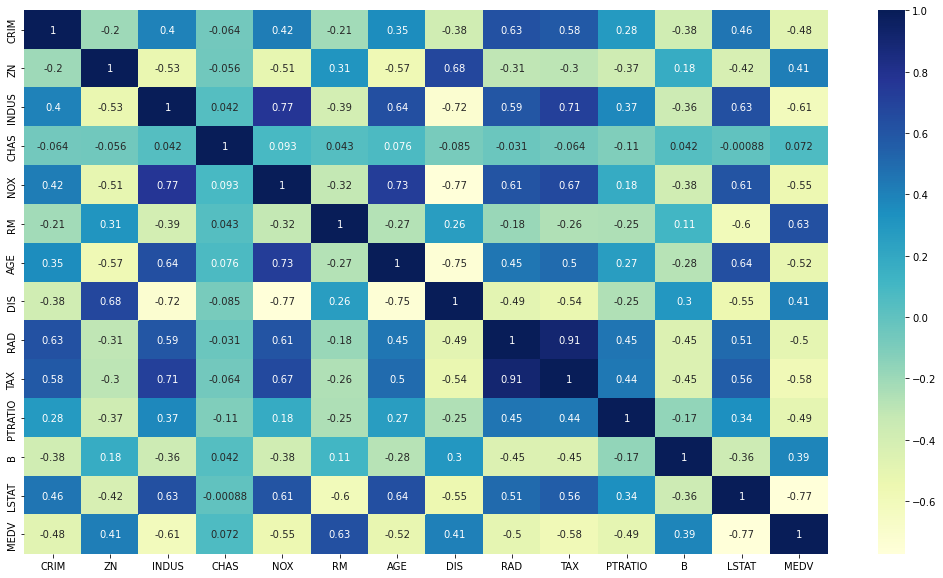

In [11]:
# Matriz de correlacion
fig = plt.figure(figsize = (18,10))
sns.heatmap(df_procesado.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Información obtenida:
- Hay una alta correlación positiva entre el precio y el número de habitaciones RM (0.63).
- Hay una alta correlación negativa entre el precio y el porcentaje de personas con estatus bajo LSTAT (-0.77).
- Hay una correlación negativa entre el precio y la proporcion de tiendas no minoristas o zonas industriales INDUS (-0.61).
- Del resto de categorías, consideramos que su correlación con el precio no es tan relevante.


Realizaremos gráficas de dispersión para visualizar estas correlaciones.

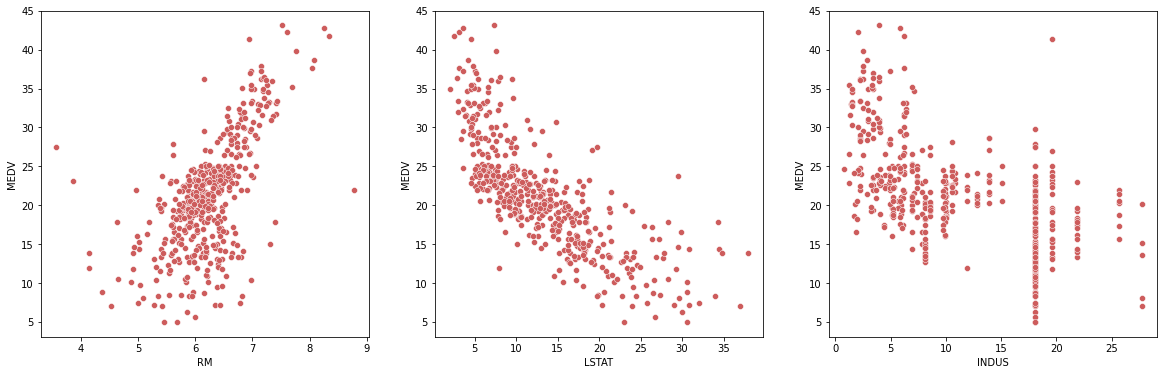

In [13]:
#Gráficas de dispersión
df_disp1 = df_procesado[['RM','LSTAT','INDUS','MEDV']]
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))
index = 0
axs = axs.flatten()
for k,v in df_disp1.items():
    if index != 3:
        sns.scatterplot(x=k, y ='MEDV', data=df_disp1, color = 'indianred', ax=axs[index])
        index += 1

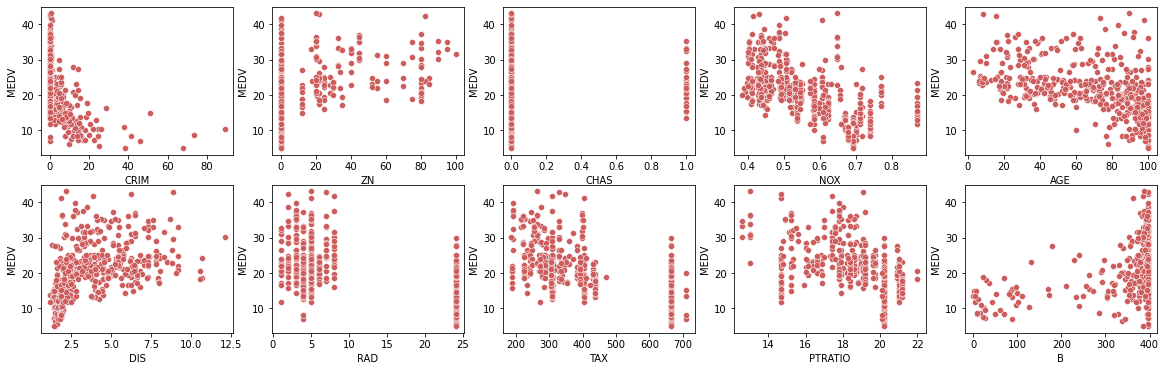

In [14]:
#Observemos la dispersión del resto de las categorías con MEDV
df_disp2 = df_procesado[['CRIM','ZN','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','MEDV']]
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 6))
index = 0
axs = axs.flatten()
for k,v in df_disp2.items():
    if index != 10:
        sns.scatterplot(x=k, y ='MEDV', data=df_disp2, color = 'indianred', ax=axs[index])
        index += 1

Información obtenida:
- Al realizar las gráficas de dispersión se pueden visualizar que puede haber tendencias lineales, sobre todo con el número de habitaciones RM y la proporción de gente de clase baje LSTAT por lo que podemos realizar una primera aproximación con una regresión lineal simple o polinomial.

# 2. MODELOS DE MACHINE LEARNING

Pondremos a pruebas diferentes modelos de machine learning para la predicción del precio MEDV:
- 2.1 Regresion Lineal Simple
- 2.2 Regresión Lineal Multiple
- 2.3 Regresión Polinomial
- 2.4 Maquinas de Vectores de Soporte
- 2.5 Arboles de decisión

## 2.1 Regresión Lineal Simple

Este modelo intenta ajustar una ecuación lineal simple de la forma:
$$Y = b + mX$$
Minimizando la función de error MSE:
$$ MSE = \dfrac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n} $$
por medio de mínimos cuadrados.

En base al EDA y al preprocesamiento realizado, hemos adaptado los datos para el correcto entrenamiento de un algoritmo de regresión lineal simple.
Donde las variables dependientes e independientes están altamente correlacionadas, además de que sus datos se distribuyen de forma normal y no presentan demasiados valores extremos que dificulten el aprendizaje del modelo. Para medir el rendimiento del modelo utilizaremos la métrica $R^2$ dado por:

$$ R^2 = 1 - \dfrac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

Donde $\hat{y}_i$ es el i-ésimo valor predicho y $\bar{y}$ el promedio de los datos verdaderos. EL valor de $R^2$ oscila entre 0 y 1, donde, mientras más cercano esté de 1, mayor precisión tendrá el modelo. 

Y para medir el error utilizaremos la raíz del error cuadrático medio (RMSE) dado por:

$$ RMSE = \sqrt{ \dfrac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n} }$$

Donde, mientras más cercano esté del 0, menor error habrá.

### MEDV vs RM 

In [15]:
# Separamos los datos de entrenamiento y prueba, tomando un 20% de los datos para la prueba
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1), 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_simple = lr.coef_
b1_simple = lr.intercept_
R1_simple = lr.score(X_train1,Y_train1)  # score R^2
Y_pred1_simple = lr.predict(X_test1)  # m1*X + b1
RMSE1_simple = np.sqrt(mean_squared_error(Y_test1, Y_pred1_simple))

In [16]:
#Resultados del modelo
print(f"La pendiente es: {m1_simple},  y la intersección es: {b1_simple}")
print()
print(f"La precisión del modelo R^2: {R1_simple}")
print()
print(f"El error RMSE: {RMSE1_simple}")

La pendiente es: [7.34692426],  y la intersección es: -24.616327055286366

La precisión del modelo R^2: 0.40700094546770615

El error RMSE: 6.420034985823339


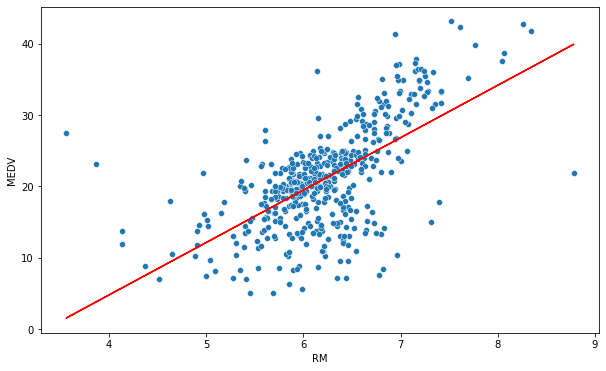

In [17]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(df_procesado['RM'].values.reshape(-1,1), m1_simple * df_procesado['RM'].values + b1_simple, color = 'r')
plt.show()

### MEDV vs LSTAT

In [18]:
# Modelo sin preprocesamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df['LSTAT'].values.reshape(-1,1), 
                                                        df['MEDV'].values,
                                                        test_size = 0.20)
#Entreno el modelo
lr.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_simple = lr.coef_
b2_simple = lr.intercept_
R2_simple = lr.score(X_train2,Y_train2)  # score R^2
Y_pred2_simple = lr.predict(X_test2)  # m2*X + b2
RMSE2_simple = np.sqrt(mean_squared_error(Y_test2, Y_pred2_simple))

In [19]:
#Resultados del modelo
print(f"La pendiente es: {m2_simple},  y la intersección es: {b2_simple}")
print()
print(f"La precisión del modelo R^2: {R2_simple}")
print()
print(f"El error RMSE: {RMSE2_simple}")

La pendiente es: [-0.94705855],  y la intersección es: 34.58110259426988

La precisión del modelo R^2: 0.5359677101830127

El error RMSE: 5.527415029921299


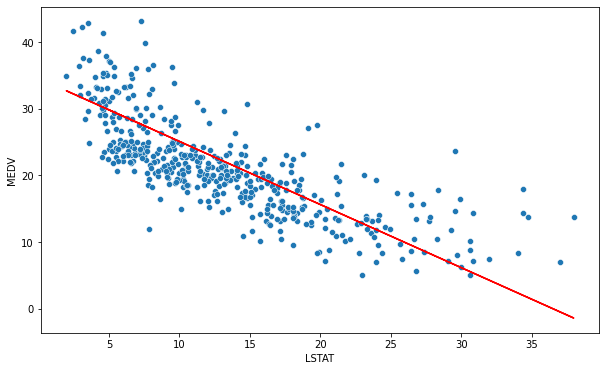

In [20]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(df_procesado['LSTAT'].values.reshape(-1,1), m2_simple * df_procesado['LSTAT'].values + b2_simple, color = 'r')
plt.show()

Se obtuvo la siguiente información:
- Comparando el rendimiento $R^2$ y el error RMSE de ambos entrenamientos, tenemos que la mejor variable para predecir los precios MEDV es la variable LSTAT. Pero el valor de $R^2$ sigue siendo un valor bajo para considerarlo un buen modelo para estos datos, por lo que la prueba MEDV vs LSTAT se pondrá a prueba con los siguientes modelos en busca de la mejor predicción.

## 2.2 Regresión Lineal Multiple

Este modelo intenta ajustar una ecuación de la forma:
$$ Y = b_0 + b_1 X_1 + b_2 X_2 + \cdots $$
Donde X_i es la i-ésima varable independiente. Para este modelo, las variables independientes deben estar altamente correlacionadas con la variable dependiente, pero no  deben estar correlacionadas entre sí; es decir, que presenten colinealidad. Además, hay que tener cuidado ya que la dificultad del modelo aumenta conforme aumenta el número de variables independientes.

En la matriz de correlaciones, señalamos varias las columnas con mayor correlación con MEDV como: "RM", "LSTAT" e "INDUS". Vemos además que entre "RM" y "LSTAT" hay una correlación  del -0.6 y "LSTAT" e "INDUS" del 0.63. Entre   "RM" y "INDUS" presentan una correlación baja del -0.39.

En base a esto realizaremos dos pruebas, una donde probamos las 3 categorías y otra donde solo probamos con RM y INDUS que presentan una correlación baja. Se utilizaran los mismos criterios de $R^2$ y RMSE para medir el rendimiento y error del modelo.

### MEDV vs RM, LSTAT y INDUS

In [21]:
# Entrenando el modelo con "RM", "LSTAT" y "PTRIATO"
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado[['RM','LSTAT','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_mul = lr_multiple.coef_  #seran 3 coeficientes
b1_mul = lr_multiple.intercept_
R1_mul = lr_multiple.score(X_train1,Y_train1)  # score R^2
Y_pred1_mul = lr_multiple.predict(X_test1)  # m2*X + b2
RMSE1_mul = np.sqrt(mean_squared_error(Y_test1, Y_pred1_mul))

In [22]:
#Resultados del modelo
print(f"Los coeficientes son: {m1_mul},  y la intersección es: {b1_mul}")
print()
print(f"La precisión del modelo R^2: {R1_mul}")
print()
print(f"El error RMSE: {RMSE1_mul}")

Los coeficientes son: [ 2.58041501 -0.50412929 -0.2193311 ],  y la intersección es: 14.162712663559336

La precisión del modelo R^2: 0.6724036231054438

El error RMSE: 4.541433299311921


### MEDV vs RM y INDUS

In [23]:
# Entrenando el modelo con "RM", "LSTAT" y "PTRIATO"
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado[['RM','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Entreno el modelo
lr_multiple.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_mul = lr_multiple.coef_  #seran 2 coeficientes
b2_mul = lr_multiple.intercept_
R2_mul = lr_multiple.score(X_train2,Y_train2)  # score R^2
Y_pred2_mul = lr_multiple.predict(X_test2)  # m2*X + b2
RMSE2_mul = np.sqrt(mean_squared_error(Y_test2, Y_pred2_mul))

In [24]:
#Resultados del modelo
print(f"Los coeficientes son: {m2_mul},  y la intersección es: {b2_mul}")
print()
print(f"La precisión del modelo R^2: {R2_mul}")
print()
print(f"El error RMSE: {RMSE2_mul}")

Los coeficientes son: [ 5.47691276 -0.41297068],  y la intersección es: -8.170365725342148

La precisión del modelo R^2: 0.5332921968429628

El error RMSE: 4.28985243159215


Se obtuvo la siguiente información:
- Se obtuvo una mejor predicción con las tres categorias juntas que combinando solamente 2, con una $R^2=0.67$, y un $RMSE = 4.006$, por lo que es el mejor resultado que tenemos hasta el momento. Sin embargo sigue siendo bajo para considerarlo un buen modelo por lo que lo pondremos a prueba con el resto de los modelos.


## 2.3 Regresión Polinomial

Este modelo intenta ajustar una ecuación:
$$ Y = b_0 + b_1X_1 + b_2X_1^2 + ... + c_1X_2 + c_2X_2^2 +...$$
Hay que tener en cuenta que este modelo tiene una tendencia a sobreajustarse si el número del polinomio aumenta por lo que solo nos limitaremos a polinomios de grado 2. Además de que la complejidad de la fórmula aumenta conforme agregamos más variables independientes.

En la sección 1.4 visualizamos algunas gráficas de dispersión con la variable MEDV y dos categorías que podemos probar con este modelo son RM Y LSTAT. El primero debido a que podemos apreciar una curvatura en la parte inferior de los datos, mientras que del segundo apreciamos una curvatura en los extremos de lso datos.

### MEDV VS RM

In [25]:
#definimos los datos de prueba y entrenamiento
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
#se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Se transforma las caracteristicas existentes en características de mayor grado
X_train1_poli = poli_reg.fit_transform(X_train1) #distribuimos la variable ind. en X y X^2
X_test1_poli = poli_reg.fit_transform(X_test1)

pr.fit(X_train1_poli, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_pol = pr.coef_  #seran 2 coeficientes
b1_pol = pr.intercept_
R1_pol = pr.score(X_train1_poli,Y_train1)  # score R^2
Y_pred1_pol = pr.predict(X_test1_poli)  # c1*X +c2X^2 + b1
RMSE1_pol = np.sqrt(mean_squared_error(Y_test1, Y_pred1_pol))

In [26]:
#Resultados del modelo
print(f"Los coeficientes son: {m1_pol},  y la intersección es: {b1_pol}")
print()
print(f"La precisión del modelo R^2: {R1_pol}")
print()
print(f"El error RMSE: {RMSE1_pol}")

Los coeficientes son: [  0.         -16.83406049   1.92905597],  y la intersección es: 50.52367591567793

La precisión del modelo R^2: 0.4417723392869518

El error RMSE: 5.081103155401708


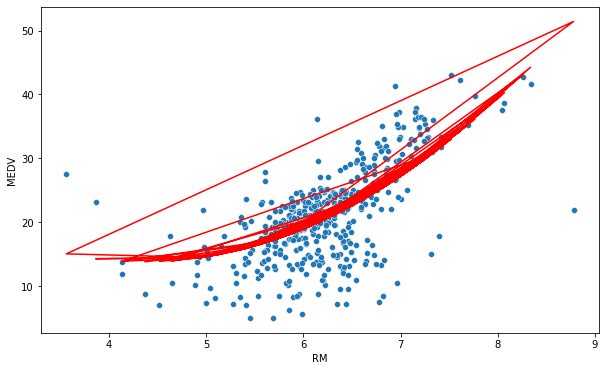

In [27]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(df_procesado['RM'].values.reshape(-1,1),
         m1_pol[2] * df_procesado['RM'].values**2 + m1_pol[1] * df_procesado['RM'].values + b1_pol, color = 'r')
plt.show()

### MEDV vs LSTAT

In [28]:
#definimos los datos de prueba y entrenamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado['LSTAT'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Se transforma las caracteristicas existentes en características de mayor grado
X_train2_poli = poli_reg.fit_transform(X_train2) #distribuimos la variable ind. en X y X^2
X_test2_poli = poli_reg.fit_transform(X_test2)

pr.fit(X_train2_poli, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_pol = pr.coef_  #seran 2 coeficientes
b2_pol = pr.intercept_
R2_pol = pr.score(X_train2_poli,Y_train2)  # score R^2
Y_pred2_pol = pr.predict(X_test2_poli)  # c1*X +c2X^2 + b1
RMSE2_pol = np.sqrt(mean_squared_error(Y_test2, Y_pred2_pol))

In [29]:
#Resultados del modelo
print(f"Los coeficientes son: {m2_pol},  y la intersección es: {b2_pol}")
print()
print(f"La precisión del modelo R^2: {R2_pol}")
print()
print(f"El error RMSE: {RMSE2_pol}")

Los coeficientes son: [ 0.         -1.705099    0.02859155],  y la intersección es: 37.12830146985519

La precisión del modelo R^2: 0.6618052862462989

El error RMSE: 4.023583152910159


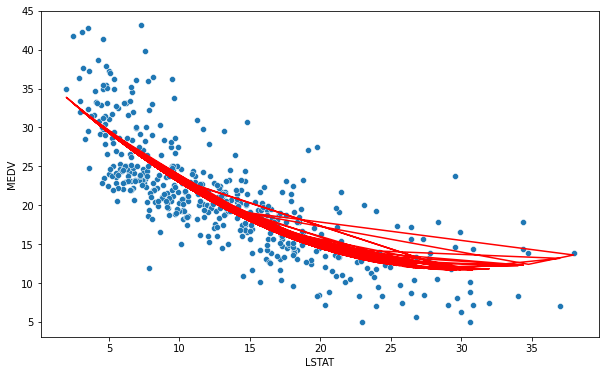

In [30]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(df_procesado['LSTAT'].values.reshape(-1,1),
         m2_pol[2] * df_procesado['LSTAT'].values**2 + m2_pol[1] * df_procesado['LSTAT'].values + b2_pol, color = 'r')
plt.show()

Se obtuvo la siguiente información:
- Obtenemos una mejor predicción con la variable LSTAT, con una $R^2=0.67$, y un $RMSE = 4.87$, muy similar a los resultados del algoritmo de regresión multiple de 3 categorías. Sin embargo este lo supera debido a que solo requiere de una variable para realizar la descripción por lo que consideramos que este modelo tiene el mejor rendimiento hasta ahora.

## 2.4 Maquina de Vectores de Soporte (Regresión)

Dado un conjunto de datos, se obtiene un hiperplano (una curva para el caso de dos dimensiones, un plano para 3d, un hiperplano para dimesiones mayores) que se ajuste al comportamiento de los datos como en la regresión lineal y polinomial. La fórmula de este hiperplano está dado por:

$$ Y = \bar{w} X + b$$

A este hiperplano se le ajustan unas bandas que son llamadas vectores de soporte, que se encuentran a una distancia $\epsilon$ y que tratarán de contener la mayoría de los puntos del modelo como se muestra en la siguiente imagen:
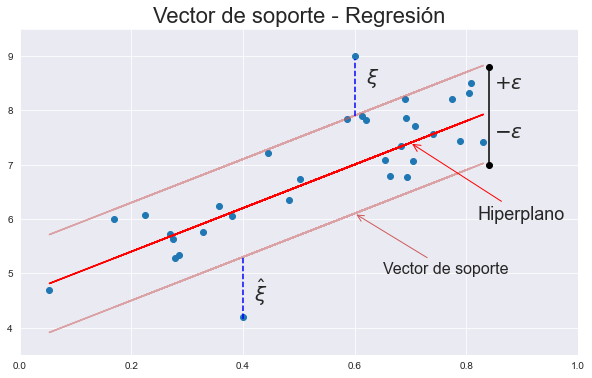
A los puntos fuera de las bandas conformarán los errores y se medirá la distancia $\xi$ o $\hat{\xi}$ con respecto a la banda más cercana. El algoritmo tratará de minimizar la siguiente función de error:

$$ \dfrac{1}{2} ||\bar{w}||^2 + C \sum_{i=1}^n (\xi_i + \hat{\xi_i})$$

Donde C es una constante que determina el equilibrio entre el ancho de las bandas y la cantidad de error que toleramos, mientras más grande sea C, más pequeña será la distancias  de las bandas con el hiperplano y mientras más pequeño sea C, más grande será la distancia de las bandas al hiperplano. 



Para este algoritmo, crearemos un algoritmo de regresión lineal (MEDV vs RM) y uno no lineal (MEDV vs LSTAT). Para evaluar el rendimiento del algoritmo utilizaremos la estadística $R^2$.

### MEDV vs RM

In [31]:
#importamos la paquetería que contiene el algoritmo SVM
from sklearn.svm import SVR

#definimos los datos de prueba y entrenamiento
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
svr_lin = SVR(kernel = 'linear', C=1.0, epsilon = 0.2)  # kernel = 'linear' especifica que realizará una regresión lineal
                                                    # C nos apoya con la regularidad de la función y el error que se va a tolerar
                                                    # epsilon infiere en el ancho de las bandas y también controla el error
        
#Entrenamos el modelo
svr_lin.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_svr = svr_lin.coef_  #seran 2 coeficientes
b1_svr = svr_lin.intercept_
R1_svr = svr_lin.score(X_train1,Y_train1)  # score R^2
Y_pred1_svr = svr_lin.predict(X_test1)  # m1*X  + b1
RMSE1_svr = np.sqrt(mean_squared_error(Y_test1, Y_pred1_svr))

In [32]:
#Resultados del modelo
print(f"Los coeficientes son: {m1_svr},  y la intersección es: {b1_svr}")
print()
print(f"La precisión del modelo R^2: {R1_svr}")
print()
print(f"El error RMSE: {RMSE1_svr}")

Los coeficientes son: [[8.38939727]],  y la intersección es: [-30.33006955]

La precisión del modelo R^2: 0.3552070655268702

El error RMSE: 5.222533629712785


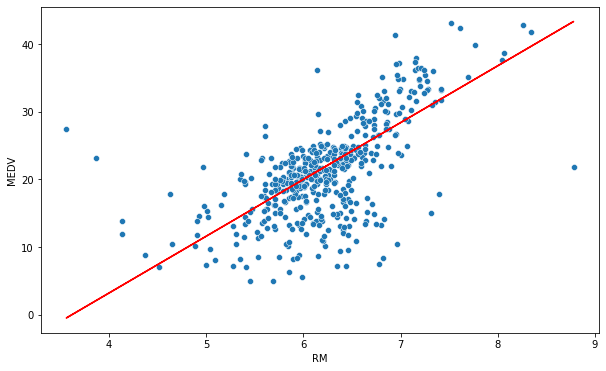

In [33]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(df_procesado['RM'].values.reshape(-1,1), m1_svr[0] * df_procesado['RM'].values + b1_svr, color = 'r')
plt.show()

### MEDV vs LSTAT

In [34]:
#definimos los datos de prueba y entrenamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado['LSTAT'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
svr_poly = SVR(kernel = 'poly',degree = 2, C=1.0, epsilon = 0.2)  # kernel = 'poly' especifica que realizará una regresión polinomial
                                                    # C nos apoya con la regularidad de la función y el error que se va a tolerar
                                                    # epsilon infiere en el ancho de las bandas y también controla el error
        
#Entrenamos el modelo
svr_poly.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
R2_svr = svr_poly.score(X_train2,Y_train2)  # score R^2
Y_pred2_svr = svr_poly.predict(X_test2) 
RMSE2_svr = np.sqrt(mean_squared_error(Y_test2, Y_pred2_svr))

In [35]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R2_svr}")
print()
print(f"El error RMSE: {RMSE2_svr}")

La precisión del modelo R^2: 0.431376791354932

El error RMSE: 5.281395593962059


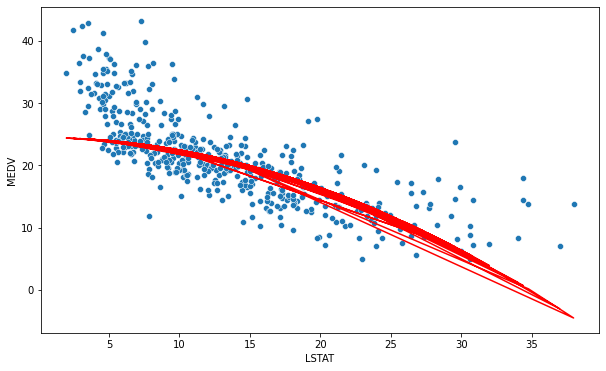

In [37]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(df_procesado['LSTAT'].values.reshape(-1,1), svr_poly.predict(df_procesado['LSTAT'].values.reshape(-1,1)), color = 'r')
plt.show()

Se obtiene la siguiente información:
- Para el caso de MEDV vs RM se obtienen resultados similares a la regresión lineal, por lo que este conjunto de datos no es muy bueno para este algoritmo.
- El mejor resultado con este algoritmo fue con la prueba MEDV vs LSTAT aunque la regresión lineal tuvo mejores resultados con estos datos.

## 2.5 Arboles de decisión

Los arboles de decisión es un algoritmo compuesto por un arbol jerarquico de condicionales "if-then-else", donde separa la data de entrenamiento original (la raiz del arbol) en dos diferentes subcategorías dependiendo de las caracteristicas o valores de los datos, estas dos subcategorías conformar en primer nodo del arbol. El algoritmo repite este procedimiento de separar los datos de cada subcategoría en dos conjuntos diferente, teniendo así, 4 subcategorías en total, que conforman el 3er nodo. En el caso de Regresión, este proceso lo repite hasta que los valores Y de los datos de entrenamiento son tan cercanos entre sí, separando los valores independientes X en diferentes subcategorías. A continuación una imagen de como luce la separación de los datos por este algoritmo, con 2 (izquierda) y 3 (derecha) nodos de profundidad:


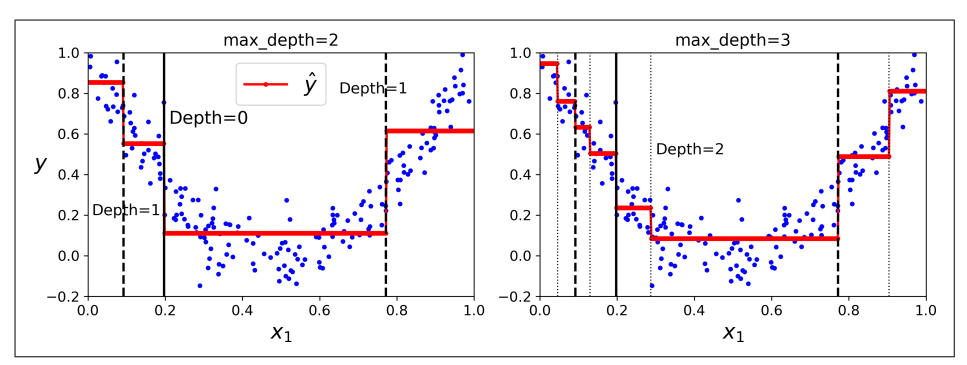
Imagen tomada de: Aurélien Géron. "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow". (2019). O’Reilly Media, Inc. Pag. 187


En caso de que haya demasiados nodos, el modelo puede correr el riesgo de sobreajuste por lo que es normal que el programador escoga la profundidad del arbol. A continuación una imagen de como luce la separación de datos si no se restringe el número de nodos (izquierda) y cuando se escoge una profundidad de 10 (derecha):

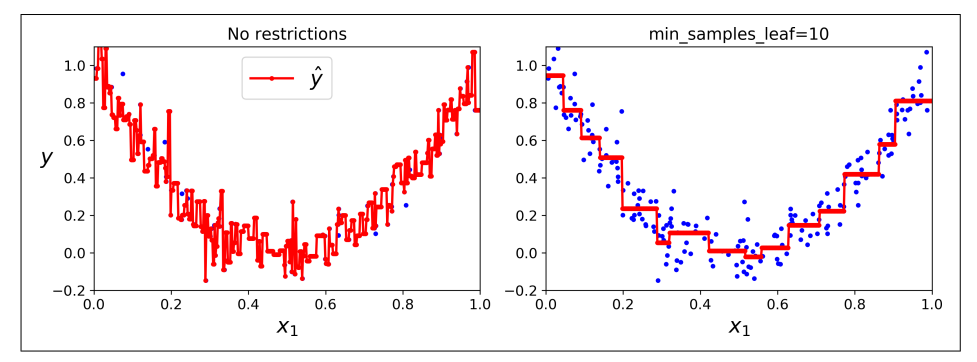
Imagen tomada de: Aurélien Géron. "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow". (2019). O’Reilly Media, Inc. Pag. 187



En contraste con la regresión lineal, los arboles de decisión tienen la habilidad de descubrir patrones escondidos correspondientes a interaccciones complejas en la data. Es por ello que realizaremos las mismas pruebas que con la regresión lineal simple y multiple para comparar ambos resultados.


### MEDV vs RM

In [53]:
#importamos la paquetería que contiene el algoritmo SVM
from sklearn.tree import DecisionTreeRegressor

#definimos los datos de prueba y entrenamiento
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
adr = DecisionTreeRegressor(max_depth = 5) #Profundidad del arbol, para evitar el sobreajuste dle modelo

#Entrenamos el modelo
adr.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
R1_adr = adr.score(X_train1,Y_train1)  # score R^2
Y_pred1_adr = adr.predict(X_test1)  # m1*X  + b1
RMSE1_adr = np.sqrt(mean_squared_error(Y_test1, Y_pred1_adr))

In [54]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R1_adr}")
print()
print(f"El error RMSE: {RMSE1_adr}")

La precisión del modelo R^2: 0.6197832903348062

El error RMSE: 5.514396827950553


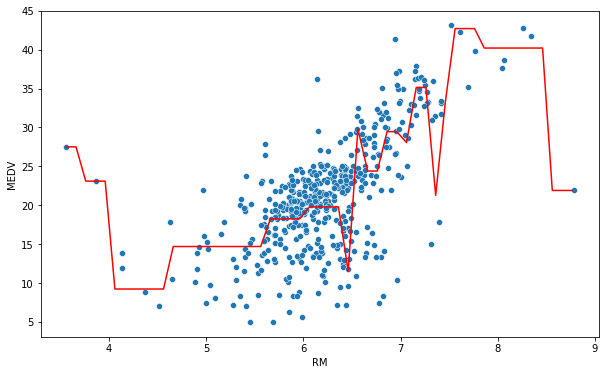

In [64]:
"""
Graficamos con  valores de X dentro del dominio de los datos de RM, 
esto para visualizar en orden como el algoritmo va haciendo la separación de los datos.
"""
X_grid = np.arange(min(df_procesado['RM']),max(df_procesado['RM']),0.1) 
X_grid = X_grid.reshape(len(X_grid),1)

plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(X_grid, adr.predict(X_grid), color = 'r')
plt.show()

### MEDV vs LSTAT

In [65]:
#definimos los datos de prueba y entrenamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado['LSTAT'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
        
#Entrenamos el modelo
adr.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
R2_adr = adr.score(X_train2,Y_train2)  # score R^2
Y_pred2_adr = adr.predict(X_test2) 
RMSE2_adr = np.sqrt(mean_squared_error(Y_test2, Y_pred2_adr))

In [66]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R2_adr}")
print()
print(f"El error RMSE: {RMSE2_adr}")

La precisión del modelo R^2: 0.7447550331987116

El error RMSE: 4.344527291075352


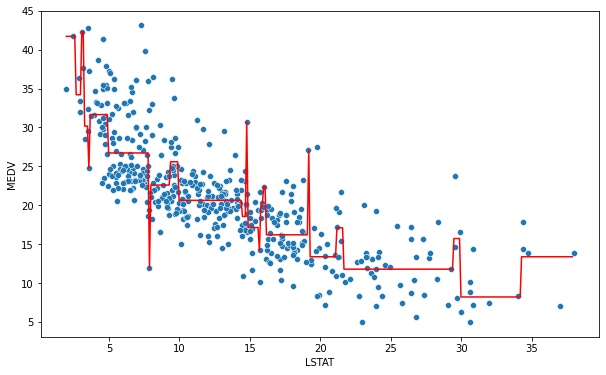

In [67]:
"""
Graficamos con  valores de X dentro del dominio de los datos de RM, 
esto para visualizar en orden como el algoritmo va haciendo la separación de los datos.
"""
X_grid = np.arange(min(df_procesado['LSTAT']),max(df_procesado['LSTAT']),0.1) 
X_grid = X_grid.reshape(len(X_grid),1)

plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(X_grid, adr.predict(X_grid), color = 'r')
plt.show()

### MEDV vs RN, LSTAT, INDUS

In [68]:
#definimos los datos de prueba y entrenamiento
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_procesado[['RM','LSTAT','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
        
#Entrenamos el modelo
adr.fit(X_train3, Y_train3)

#Obtengo los coeficientes y errores de la prediccion
R3_adr = adr.score(X_train3,Y_train3)  # score R^2
Y_pred3_adr = adr.predict(X_test3) 
RMSE3_adr = np.sqrt(mean_squared_error(Y_test3, Y_pred3_adr))

In [69]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R3_adr}")
print()
print(f"El error RMSE: {RMSE3_adr}")

La precisión del modelo R^2: 0.8834672956961138

El error RMSE: 3.457529187262275


Información  obtenida:
- Notemos que para los entrenamientos de MEDV vs RM y MEDV vs LSTAT tiene mejor rendimiento ya que su $R^2$ es mayor y también menor error ya que el $RMSE$ es más pequeño que los entrenamientos con regresión lineal e incluso polinomial. 
- Con el entrenamiento de MEDV vs RN,LSTAT, INDUS obtunemos un resultado muy superior al de regresión multilineal, teniendo la mejor $R^2$ y el error más pequeño de todos los entrenamientos, resultando en el mejor algoritmo para estos datos hata ahora.